# 흉부 X-ray 이미지로 정상/코로나/폐렴을 분류하는 프로젝트


url : https://www.kaggle.com/datasets/pranavraikokte/covid19-image-dataset?resource=download

# 1. 이미지 파일 경로 불러오기

In [1]:
import os

In [2]:
IMAGE_FORMAT = ["jpeg", "jpg", "png"]

def list_image_files(data_dir, sub_dir):
    image_files = []
    images_dir = os.path.join(data_dir, sub_dir)
    for file_path in os.listdir(images_dir):
        if file_path.split(".")[-1] in IMAGE_FORMAT:
            image_files.append(os.path.join(sub_dir, file_path))
    
    return image_files

In [3]:
data_dir = "./Covid19-dataset/train/"

normals_list = list_image_files(data_dir, "Normal")
covids_list = list_image_files(data_dir, "Covid")
pneumonias_list = list_image_files(data_dir, "Viral Pneumonia")


In [4]:
print(len(normals_list), len(covids_list), len(pneumonias_list))

70 111 70


In [5]:
data_dir + normals_list[0]

'./Covid19-dataset/train/Normal\\01.jpeg'

# 2. 이미지파일을 RGB 3차원 배열로 불러오기

In [6]:
import cv2

In [7]:
def get_RGB_image(data_dir, file_name):
    image_file = os.path.join(data_dir, file_name)
    image = cv2.imread(image_file)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

# 3. 이미지데이터 확인하기

In [8]:
import matplotlib.pyplot as plt
from ipywidgets import interact

In [9]:
# 제일 작은 파일을 가진 폴더를 기준으로 스크롤 바를 제작
min_num_files = min(len(normals_list), len(covids_list), len(pneumonias_list))
print(min_num_files)

70


In [10]:
# 이미지 데이터를 보면서 인사이트 찾기
# 데이터마다 사이즈가 다름을 확인 --> resize를 해주어야 함
@interact(index=(0, min_num_files-1))
def show_samples(index=0):
    normal_image = get_RGB_image(data_dir, normals_list[index])
    covid_image = get_RGB_image(data_dir, covids_list[index])
    pneumonia_image = get_RGB_image(data_dir, pneumonias_list[index])
    
    plt.figure(figsize=(12,8))
    plt.subplot(131)
    plt.title("Normal")
    plt.imshow(normal_image)
    
    plt.subplot(132)
    plt.title("Covid")
    plt.imshow(covid_image)
    
    plt.subplot(133)
    plt.title("Pneumonia")
    plt.imshow(pneumonia_image)

interactive(children=(IntSlider(value=0, description='index', max=69), Output()), _dom_classes=('widget-intera…

# 4. 학습데이터셋 클래스 구축

In [11]:
train_data_dir = "./Covid19-dataset/train/"
class_list = ["Normal", "Covid", "Viral Pneumonia"]

In [12]:
class Chest_dataset():
    def __init__(self, data_dir, transformer=None):
        self.data_dir = data_dir
        normals = list_image_files(data_dir, "Normal")
        covids = list_image_files(data_dir, "Covid")
        pneumonias = list_image_files(data_dir, "Viral Pneumonia")
        
        self.files_path = normals + covids + pneumonias
        self.transformer = transformer
    
    
    def __len__(self):
        return len(self.files_path)
    
    
    def __getitem__(self, index):
        image_file = os.path.join(self.data_dir, self.files_path[index])
        image = cv2.imread(image_file)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
        class_name = self.files_path[index].split(os.sep)[0]        
        class_id = class_list.index(class_name)
        
        if self.transformer:
            image = self.transformer(image)
            class_id = torch.Tensor([target]).long()
            
        return image, class_id

In [13]:
dset = Chest_dataset(data_dir=train_data_dir)

In [14]:
image, class_id = dset[0]

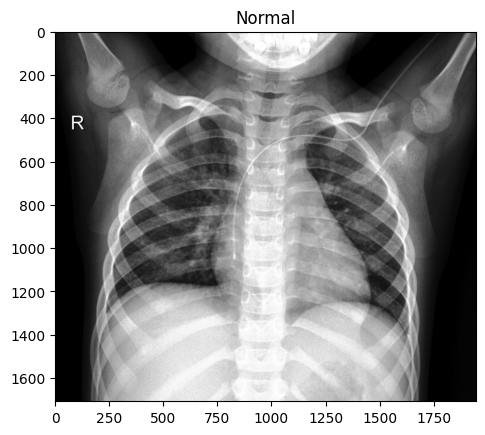

In [15]:
index = 0
image, target = dset[index]


plt.title(class_list[target])
plt.imshow(image)

In [16]:
print(image.shape)

(1708, 1944, 3)


# 5. 연산가능한 텐서형으로 데이터 변환하기 

In [17]:
import torch
from torchvision import transforms

In [18]:
transformer = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((224, 224)),
    transforms.Normalize(mean=[0.5,0.5,0.5], std=[0.5,0.5,0.5])
])

In [19]:
train_dset = Chest_dataset(train_data_dir, transformer)
index = 200
image = train_dset[index][0]
target = train_dset[index][1]
print(image.shape)
print(target)

torch.Size([3, 224, 224])
tensor([0])


In [20]:
image

tensor([[[-0.5545, -0.4952, -0.5317,  ...,  0.9883,  0.6220, -0.7319],
         [-0.4914, -0.5102, -0.5333,  ..., -0.7669,  0.2207, -0.7700],
         [-0.5016, -0.4899, -0.5316,  ...,  0.9897, -0.9195, -0.7240],
         ...,
         [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
         [-0.9827,  0.2870,  0.9899,  ..., -1.0000, -1.0000, -1.0000],
         [-0.9626,  0.1117, -0.9820,  ..., -1.0000, -1.0000, -1.0000]],

        [[-0.5545, -0.4952, -0.5317,  ...,  0.9883,  0.6220, -0.7319],
         [-0.4914, -0.5102, -0.5333,  ..., -0.7669,  0.2207, -0.7700],
         [-0.5016, -0.4899, -0.5316,  ...,  0.9897, -0.9195, -0.7240],
         ...,
         [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
         [-0.9827,  0.2870,  0.9899,  ..., -1.0000, -1.0000, -1.0000],
         [-0.9626,  0.1117, -0.9820,  ..., -1.0000, -1.0000, -1.0000]],

        [[-0.5545, -0.4952, -0.5317,  ...,  0.9883,  0.6220, -0.7319],
         [-0.4914, -0.5102, -0.5333,  ..., -0

#  6. 데이터 로더 구현하기

In [21]:
from torch.utils.data import DataLoader

In [22]:
train_data_dir = "./Covid19-dataset/train/"
val_data_dir = "./Covid19-dataset/test/"

train_dset = Chest_dataset(train_data_dir, transformer)
train_dloader = DataLoader(train_dset, batch_size=4, shuffle=True, drop_last=True)

val_dset = Chest_dataset(val_data_dir, transformer)
val_dloader = DataLoader(val_dset, batch_size=1, shuffle=False)



In [23]:
def build_dataloader(train_data_dir, val_data_dir):
    dataloaders = {}
    train_dset = Chest_dataset(train_data_dir, transformer)
    dataloaders["train"] = DataLoader(train_dset, batch_size=4, shuffle=True, drop_last=True)

    val_dset = Chest_dataset(val_data_dir, transformer)
    dataloaders["val"] = DataLoader(val_dset, batch_size=1, shuffle=False)
    return dataloaders

In [24]:
dataloaders = build_dataloader(train_data_dir, val_data_dir)

In [25]:
print(dataloaders)

{'train': <torch.utils.data.dataloader.DataLoader object at 0x0000027426BE5690>, 'val': <torch.utils.data.dataloader.DataLoader object at 0x00000274291CB040>}


#  7. Claasification 모델(VGG19) 불러오기

In [26]:
from torchvision import models

In [27]:
model = models.vgg19(pretrained=True)

C:\Users\tfg00\anaconda3\envs\fastcampus\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\tfg00\anaconda3\envs\fastcampus\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [29]:
from torchsummary import summary

summary(model, (3, 224, 224), batch_size=1, device='cpu')

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [1, 64, 224, 224]           1,792
              ReLU-2          [1, 64, 224, 224]               0
            Conv2d-3          [1, 64, 224, 224]          36,928
              ReLU-4          [1, 64, 224, 224]               0
         MaxPool2d-5          [1, 64, 112, 112]               0
            Conv2d-6         [1, 128, 112, 112]          73,856
              ReLU-7         [1, 128, 112, 112]               0
            Conv2d-8         [1, 128, 112, 112]         147,584
              ReLU-9         [1, 128, 112, 112]               0
        MaxPool2d-10           [1, 128, 56, 56]               0
           Conv2d-11           [1, 256, 56, 56]         295,168
             ReLU-12           [1, 256, 56, 56]               0
           Conv2d-13           [1, 256, 56, 56]         590,080
             ReLU-14           [1, 256,

# 8. 데이터에 맞도록 모델 Head 부분 변경하기

In [30]:
import torch.nn as nn

In [34]:
model.avgpool = nn.AdaptiveAvgPool2d(output_size=(1,1))
model.classifier = nn.Sequential(
    nn.Flatten(),
    nn.Linear(512, 256),
    nn.ReLU(),
    nn.Dropout(0.1),
    nn.Linear(256, 3),
    nn.Sigmoid(),
)

In [38]:
def build_vgg19_based_model(device="cpu"):
    device = torch.device(device)
    model = models.vgg19(pretrained=True)
    model.avgpool = nn.AdaptiveAvgPool2d(output_size=(1,1))
    model.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(512, 256),
        nn.ReLU(),
        nn.Dropout(0.1),
        nn.Linear(256, 3),
        nn.Sigmoid(),
    )
    return model.to(device)

In [40]:
model = build_vgg19_based_model(device="cpu")

In [41]:
summary(model, (3, 224, 224), batch_size=1, device="cpu")

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [1, 64, 224, 224]           1,792
              ReLU-2          [1, 64, 224, 224]               0
            Conv2d-3          [1, 64, 224, 224]          36,928
              ReLU-4          [1, 64, 224, 224]               0
         MaxPool2d-5          [1, 64, 112, 112]               0
            Conv2d-6         [1, 128, 112, 112]          73,856
              ReLU-7         [1, 128, 112, 112]               0
            Conv2d-8         [1, 128, 112, 112]         147,584
              ReLU-9         [1, 128, 112, 112]               0
        MaxPool2d-10           [1, 128, 56, 56]               0
           Conv2d-11           [1, 256, 56, 56]         295,168
             ReLU-12           [1, 256, 56, 56]               0
           Conv2d-13           [1, 256, 56, 56]         590,080
             ReLU-14           [1, 256,

# 9. 손실함수(Cross-Entropy) 불러오기

In [42]:
loss_func = nn.CrossEntropyLoss(reduction="mean") # Crossentropy 함수 사용

# 10. SGDM 최적화 기법 적용하기 
- Stochastic Gradient Descent with Momentum(SGDM) Optimization

In [45]:
# 파라미터, 러닝레이트
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9) 